In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv(r'C:\Users\rohit\Desktop\Data sets\Medical_Cost.csv')
df = dataset.copy()

## OUTLIERS REMOVAL

In [3]:
df = df[df['charges'] < 50000]

In [4]:
df['smoker'].value_counts()

smoker
no     1064
yes     267
Name: count, dtype: int64

## ONE HOT ENCODING FOR SMOKER FEATURE

In [5]:
df = pd.get_dummies(df ,columns=['smoker'] )
df['smoker_no'] = df[['smoker_no']].astype(int)
df['smoker_yes'] = df[['smoker_yes']].astype(int)

## ENCODING FOR BMI

In [6]:
df['bmi_enc'] = (df['bmi'] < 30).astype(int)

## ONE HOT ENCODING FOR COMBINED FEATURES OF DUMMY SMOKERS AND BMI

In [7]:
df['smo_bmi_low'] = ((df['smoker_yes']==1) & (df['bmi_enc']==1)).astype(int)

In [8]:
df['smo_bmi_high'] = ((df['smoker_yes']==1) & (df['bmi_enc']==0)).astype(int)

In [9]:
data = df[['age','smoker_no','smo_bmi_low','smo_bmi_high','charges']].copy()

In [10]:
data.head()

,age,smoker_no,smo_bmi_low,smo_bmi_high,charges
0,19,0,1,0,16884.92400
1,18,1,0,0,1725.55230
2,28,1,0,0,4449.46200
3,33,1,0,0,21984.47061
4,32,1,0,0,3866.85520


In [11]:
model = LinearRegression(fit_intercept=False)
model.fit(data[['age','smoker_no','smo_bmi_low','smo_bmi_high']] ,data['charges'])

LinearRegression(fit_intercept=False)

In [12]:
model.coef_

array([  266.98348924, -2080.96675846, 11263.37649294, 30350.22191604])

## SAVING MODEL WEIGHTS IN A FILE

In [13]:
import os
import joblib

In [14]:
os.getcwd()

'C:\\Users\\rohit\\jupternotebooks\\Medical_insurance_prediction'

In [16]:
model_path = 'LR_Model'
os.makedirs(model_path ,exist_ok=True)

In [18]:
joblib.dump(model, os.path.join(model_path, 'medical_insurance_model.joblib'))

['LR_Model\\medical_insurance_model.joblib']

In [19]:
os.listdir(model_path)

['medical_insurance_model.joblib']

## TESTING

In [20]:
import joblib

In [22]:
m = joblib.load('LR_Model/medical_insurance_model.joblib')

In [23]:
age = int(input("Enter your age:"))
smoker = input("Do you smoke(yes/no):")
bmi = int(input("Enter your bmi:"))

#preprocess
d = {'age'          :[age],
     'smoker_no'    :[1] if smoker=='no' else [0],
     'smo_bmi_low'  :[1] if smoker=='yes' and bmi<=30 else [0],
     'smo_bmi_high' :[1] if smoker=='yes' and bmi>30 else [0]
    }
ip = pd.DataFrame(d)

Enter your age: 21
Do you smoke(yes/no): no
Enter your bmi: 20


In [24]:
m.predict(ip)

array([3525.6865155])

In [25]:
m.predict(data.loc[[745] ,['age','smoker_no','smo_bmi_low','smo_bmi_high']])

array([11268.20770333])

In [26]:
data.loc[745]

age               50.00000
smoker_no          1.00000
smo_bmi_low        0.00000
smo_bmi_high       0.00000
charges         9910.35985
Name: 745, dtype: float64

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

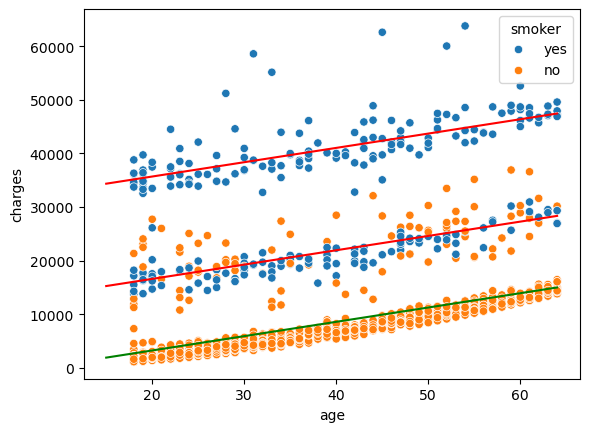

In [35]:
sns.scatterplot(dataset ,x='age' ,y='charges' ,hue='smoker')
plt.plot(np.arange(15,65,1) ,model.coef_[0]*np.arange(15,65,1)+model.coef_[1], color='green')
plt.plot(np.arange(15,65,1) ,model.coef_[0]*np.arange(15,65,1)+model.coef_[2], color='red')
plt.plot(np.arange(15,65,1) ,model.coef_[0]*np.arange(15,65,1)+model.coef_[3], color='red')